# MACHINE LEARNING: USING KNN ALGORITHM

## Problem: To study and find Index when gender, height and weight are given .

In [3]:
import pandas as pd

In [4]:
mybmidata=pd.read_csv(r"C:\Users\Surbhi Varshney\Desktop\DataSets-master\500_Person_Gender_Height_Weight_Index.csv")

In [5]:
mybmidata.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [6]:
mybmidata.head(1)

,Gender,Height,Weight,Index
0,Male,174,96,4


In [7]:
#Input Features
x_bmi=mybmidata.iloc[:,0:3]

In [8]:
x_bmi.head(1)

,Gender,Height,Weight
0,Male,174,96


In [9]:
#Binary encoding for feature Gender
x_bmi["Gender"]=x_bmi["Gender"].map({"Male":0,"Female":1})


In [10]:
x_bmi.head(1)

,Gender,Height,Weight
0,0,174,96


In [11]:
#Target
y_target=mybmidata.iloc[:,3]

In [12]:
y_target.head(1)

0    4
Name: Index, dtype: int64

In [13]:
Index_name=pd.Series(["Extremey Weak","Weak","Normal","Overweight","Obesity","Extreme Obesity"])

In [14]:
#Encoding the target
Index_name

0      Extremey Weak
1               Weak
2             Normal
3         Overweight
4            Obesity
5    Extreme Obesity
dtype: object

In [15]:
print("type of x_bmi",type(x_bmi))
print("type of y_target",type(y_target))

type of x_bmi <class 'pandas.core.frame.DataFrame'>
type of y_target <class 'pandas.core.series.Series'>


In [16]:
X_input=x_bmi.values
Y_target=y_target.values

In [17]:
print("type of X_input",type(X_input))
print("type of Y_target",type(Y_target))

type of X_input <class 'numpy.ndarray'>
type of Y_target <class 'numpy.ndarray'>


In [18]:
#Splitting features 
X_train=X_input[:400]
X_test=X_input[400:]


In [19]:
print("Sample in x_train",len(X_train))
print("Sample in x_test",len(X_test))                       

Sample in x_train 400
Sample in x_test 100


In [20]:
#Splitting target
Y_train=Y_target[:400]
Y_test=Y_target[400:]

In [21]:
print("Sample in Y_train",len(Y_train))
print("Sample in Y_test",len(Y_test))  

Sample in Y_train 400
Sample in Y_test 100


In [22]:
#Training
from sklearn.neighbors import KNeighborsClassifier

In [23]:
trainer=KNeighborsClassifier(n_neighbors=5)

In [24]:
learner=trainer.fit(X_train,Y_train)

In [25]:
i=learner.predict([[0,167,65]])
Index_name[i]

2    Normal
dtype: object

In [26]:
#Testing X_test............Y_test
YA=Y_test
Yp=learner.predict(X_test)

In [27]:
Yalist=list(YA)
Yplist=list(Yp)

In [28]:
table=pd.DataFrame({"Ya":Yalist,"Yp":Yplist})

In [29]:
table

,Ya,Yp
0,3,3
1,4,4
2,2,2
3,4,4
4,4,4
5,5,5
6,2,2
7,5,5
8,5,5
9,5,5


In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc=accuracy_score(YA,Yp)*100
print("acc is",acc)

acc is 92.0


In [32]:
#Finding k value
k_range=range(1,21)
my_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    my_score.append(accuracy_score(Y_test,Y_pred))
print(my_score)    

[0.9, 0.9, 0.89, 0.95, 0.92, 0.95, 0.91, 0.94, 0.94, 0.96, 0.94, 0.94, 0.93, 0.94, 0.94, 0.94, 0.94, 0.95, 0.94, 0.94]


In [33]:
import matplotlib.pyplot as plt

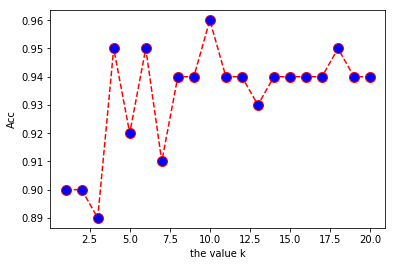

In [34]:
plt.plot(k_range,my_score,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel("the value k")
plt.ylabel("Acc")
plt.show()